In [1]:
import h5py
import numpy as np
import scipy
import itertools
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
filename = []
filename.append("/home/user12/Saad_External/MODCOD_DataSet/COD_DATASET/LDPC_DATASET.h5")
filename.append("/home/user12/Saad_External/MODCOD_DataSet/COD_DATASET/TURBO_DATASET.h5")
filename.append("/home/user12/Saad_External/MODCOD_DataSet/COD_DATASET/POLAR_DATASET.h5")
print (filename)

['/home/user12/Saad_External/MODCOD_DataSet/COD_DATASET/LDPC_DATASET.h5', '/home/user12/Saad_External/MODCOD_DataSet/COD_DATASET/TURBO_DATASET.h5', '/home/user12/Saad_External/MODCOD_DataSet/COD_DATASET/POLAR_DATASET.h5']


In [3]:
for i in filename:
    f = h5py.File(i, 'r')
    a_group_key = list(f.keys())
    data = f[a_group_key[-1]]            
    #coderate = f[a_group_key[0]]        

    print(a_group_key[-1], data.shape)

DATA (10000, 129600)
DATA (10000, 154800)
DATA (10000, 102400)


In [4]:
#LDPC  25000  cluster of 4 different code rate i.e. 1/2, 2/3, 3/4, 5/6 codes with block length 1296
#polar 100000 cluster of 1/2 CODERATE with block length 1548
#TURBO 100000 cluster of 1/3 CODERATE with block length 1024

#Extracting (2048,100000) block from each Coding scheme


In [5]:
#LDPC

f = h5py.File(filename[0], 'r')
a_group_key = list(f.keys())
LDPC_data = f[a_group_key[-1]]            
#coderate = f[a_group_key[0]]        

print(a_group_key[-1], LDPC_data.shape)

DATA (10000, 129600)


In [6]:
dataset = []
label = []

i = 0
while i in range(500):
    pointer = 0
    while pointer in range(LDPC_data.shape[1]):
        dataset.append(LDPC_data[i, pointer: pointer+2048])
        label.append(0)
        pointer += 2592
    i = i+1

i = 2500        
while i in range(3000):
    pointer = 0
    while pointer in range(LDPC_data.shape[1]):
        dataset.append(LDPC_data[i, pointer: pointer+2048])
        label.append(0)
        pointer += 2592
    i = i+1
        
i = 5000        
while i in range(5500):
    pointer = 0
    while pointer in range(LDPC_data.shape[1]):
        dataset.append(LDPC_data[i, pointer: pointer+2048])
        label.append(0)
        pointer += 2592
    i = i+1
        
i = 7500        
while i in range(8000):
    pointer = 0
    while pointer in range(LDPC_data.shape[1]):
        dataset.append(LDPC_data[i, pointer: pointer+2048])
        label.append(0)
        pointer += 2592
    i = i+1


<class 'list'> 100000


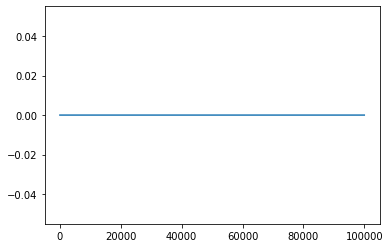

In [9]:
print (type(dataset), len(dataset))
plt.plot(label)
plt.show()

In [10]:
#Single array size = 154800
#Block length -->2048

#Turbo

f = h5py.File(filename[1], 'r')
a_group_key = list(f.keys())
Turbo_data = f[a_group_key[-1]]            
#coderate = f[a_group_key[0]]        

print(a_group_key[-1], Turbo_data.shape)


DATA (10000, 154800)


In [11]:
i = 0
while i in range(2000):
    pointer = 0
    while pointer in range(Turbo_data.shape[1]):
        dataset.append(Turbo_data[i, pointer: pointer+2048])
        label.append(1)
        pointer += 3096
    i = i+1


<class 'list'> 200000


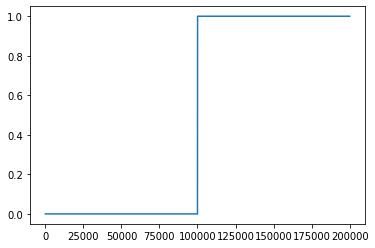

In [12]:
print (type(dataset), len(dataset))
plt.plot(label)
plt.show()

In [13]:
#polar

f = h5py.File(filename[2], 'r')
a_group_key = list(f.keys())
polar_data = f[a_group_key[-1]]            
#coderate = f[a_group_key[0]]        

print(a_group_key[-1], polar_data.shape)

DATA (10000, 102400)


In [14]:
i = 0
while i in range(2000):
    pointer = 0
    while pointer in range(polar_data.shape[1]):
        dataset.append(polar_data[i, pointer: pointer+2048])
        label.append(2)
        pointer += 2048
    i = i+1

<class 'list'> 300000


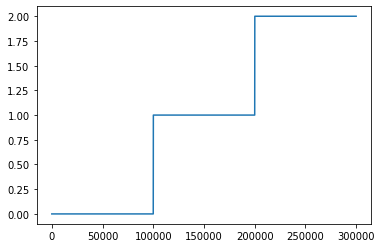

In [15]:
print (type(dataset), len(dataset))
plt.plot(label)
plt.show()

In [16]:
f = h5py.File("COD_TrainingData.hdf5", "w")
f.create_dataset("data", data=dataset)
f.create_dataset("label", data=label)
f.close()